<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<br><br><br>

<h1>Data Analysis Project </h1><br>
Data Science: Python<br>
Émilie Lopez<br>
Hult International Business School <br>
<br><br><br><br><br>

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<br>

<h2> Introduction </h2>
<br>
The dataset from the Excel file "Apprentice_Chef_Dataset.xlsx" was imported into Python. The dataset includes personal data about customers, information about their orders and their activity on the Apprentice Chef website and mobile app. This analysis will first focus on customers' behavior and its impact on revenue. Then, this analysis will include information about contact with customer services. Lastly, this analysis will provide recommendations to increase median meal ratings.

In [ ]:
# Importing pandas package
import pandas as pd

# Storing the path to the dataset
file = "./Apprentice_Chef_Dataset.xlsx"

# Reading the file
apprentice = pd.read_excel(io = file)

# Looking at the data
apprentice.head(n = 5)

In [ ]:
# Checking data types 
print(apprentice.info())

## All variables have the correct data type.

In [ ]:
# Checking for missing values
print(apprentice.isnull().sum())

## There are only missing values in family names. It will not impact the analysis.

<h2>A. Revenue</h2>
<br>
On average, Apprentice Chef generated 2,107.29 dollars per customer. The first half of customers spent less than 1,740 dollars and, the other half spent more than 1,740 dollars. The customer who generated the least revenue for the company generated 131 dollars in revenue and the customer who generated the most generated 8,793.76 dollars in revenue. The graph shows the distribution of revenue for Apprentice Chef. The histogram is skewed to the left. Fewer customers generated more that 2,000 dollars.

The revenue of the company is mainly impacted by the following customer's behavior: the number of meals ordered, the number of unique meal set ordered, the number of times a customer was in contact with customer services, the time the customer spent on the website, the time customer spend watching preparation video, the average number of meal ordered by the customer, the number of time a customer attended a cooking masterclass, the median meal rating and the total number of click on photos on the website or the app. The effect of those variables is summarized in the table (Figure B).

The two main variables that negatively impact the revenue the most are:

- **The number of unique meal sets ordered by each customer:** customers who order more unique meal sets are generating less money for the company. This is probably due to the fact the customer buy once a meal set and do not like it. They will not order it again and it might refrain them from ordering from the company.


- **The average number of meals ordered per customer:** The higher number of meals per order on average, the lower the revenue for Apprentice Chef. Weekly plans include discounts that negatively impact the revenue (10% for 3 meals and 20% for 5 meals). To maximize revenue, it could be beneficial to change the benefits on big orders (promotion for next order, bonus free cookware...).



<br>
<br>

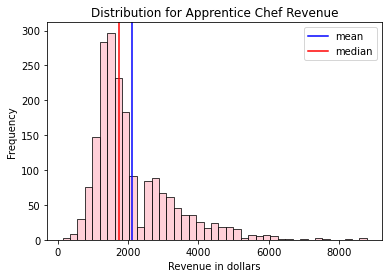
<div style = "width:image width px; font-size:80%; text-align:center;"> Figure A: Distribution of revenue for Apprenctice Chef

<br>
<br>
<br>

| Variable | Effect on revenue |
| --- | --- | 
| TOTAL_MEALS_ORDERED  | Positive |
| UNIQUE_MEALS_PURCH | Negative | 
|CONTACTS_W_CUSTOMER_SERVICE | Positive | 
| AVG_TIME_PER_SITE_VISIT | Negative |
| AVG_PREP_VID_TIME | Positive |
| LARGEST_ORDER_SIZE | Negative |  
| MASTER_CLASSES_ATTENDED | Positive | 
| MEDIAN_MEAL_RATING | Positive | 
| TOTAL_PHOTOS_VIEWED | Positive|
    
 
 <div style = "font-size:100%; text-align:center;"> Figure B: Customer behavior and their effect on revenue

In [ ]:
# Looking at basic descritive statistics for revenue
print(apprentice['REVENUE'].describe().round(2))

In [ ]:
# Creating an histogram for revenue

# Importing matplotlib and seaborn packages
import matplotlib.pyplot as plt
import seaborn as sns  

# Creating the histogram
sns.histplot(data = apprentice, x = 'REVENUE', color = 'pink')

# Adding title, labels, mean and median for increased readibility
plt.title("Distribution for Apprentice Chef Revenue")          # title
plt.xlabel("Revenue in dollars")                               # horizontal axis label
plt.ylabel("Frequency")                                        # vertical axix label
plt.axvline(x = apprentice['REVENUE'].mean(),color = 'blue')   # mean
plt.axvline(x = apprentice['REVENUE'].median(),color = 'red')  # median
plt.legend(labels =  ['mean', 'median'])                       # legend for mean and median

# Showing the histogram
plt.show()

In [ ]:
# Importing the statsmodels package
import statsmodels.formula.api as smf

# Creating a regression with all numeric variables
lm_revenue = smf.ols(formula = 'REVENUE ~ CROSS_SELL_SUCCESS + TOTAL_MEALS_ORDERED + UNIQUE_MEALS_PURCH + CONTACTS_W_CUSTOMER_SERVICE + PRODUCT_CATEGORIES_VIEWED + AVG_TIME_PER_SITE_VISIT + MOBILE_NUMBER + CANCELLATIONS_BEFORE_NOON + CANCELLATIONS_AFTER_NOON + TASTES_AND_PREFERENCES + PC_LOGINS + MOBILE_LOGINS + WEEKLY_PLAN + EARLY_DELIVERIES + LATE_DELIVERIES + PACKAGE_LOCKER + REFRIGERATED_LOCKER + AVG_PREP_VID_TIME + LARGEST_ORDER_SIZE + MASTER_CLASSES_ATTENDED + MEDIAN_MEAL_RATING + AVG_CLICKS_PER_VISIT + TOTAL_PHOTOS_VIEWED',
             data = apprentice)

# Showing summary of regression
print(lm_revenue.fit().summary())


## Next, variables with a high p-value (>0.05) will be removed because they are not statistically significant. 

In [ ]:
# Creating a regression with only statistically significant variables
lm_revenue_impoved = smf.ols(formula = 'REVENUE ~ TOTAL_MEALS_ORDERED + UNIQUE_MEALS_PURCH + CONTACTS_W_CUSTOMER_SERVICE + AVG_TIME_PER_SITE_VISIT + AVG_PREP_VID_TIME + LARGEST_ORDER_SIZE + MASTER_CLASSES_ATTENDED + MEDIAN_MEAL_RATING + TOTAL_PHOTOS_VIEWED',
                             data = apprentice)

# Showing summary
print(lm_revenue_impoved.fit().summary())

<br>
<h2>B. Customer service </h2>
<br>
The number of times a customer is in contact with customer service is one factor that positively impacts Apprentice Chef's revenue. This means that the human contact is beneficial to the company and that the customer service team is successfully solving customer demands and complaints. 

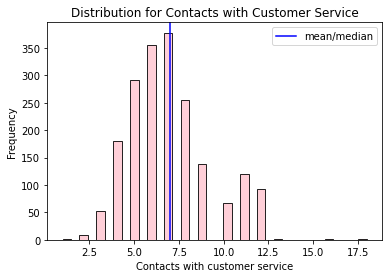
<div style = "width:image width px; font-size:80%; text-align:center;"> Figure C: Distribution of customer service contacts for Apprenctice Chef

***On average, customers were in contact with customer services 7 times***, this does not include rating meal set and completing satisfaction surveys. As stated in the case, contacts are mainly complaints and more rarely changes to orders. 

From the histogram, we can see that ***almost every Apprentice Chef customer had to contact customer services at least once***. It could be interesting to analyze the complaint subjects to improve the company website and mobile app, and therefore, reduce the number of complaints. It could also be interesting to look at how the customer service team deals with those complaints.

The contact with customer distribution almost represent a normal distribution but ***it would be better to have a distribution highly skewed to the right***, meaning that most customers do not have complaints and do not need to contact the customer service team.

In [ ]:
# Looking at basic descritive statistics for customer service
print(apprentice['CONTACTS_W_CUSTOMER_SERVICE'].describe().round(0))

In [ ]:
# Creating the histogram
sns.histplot(data = apprentice, x = 'CONTACTS_W_CUSTOMER_SERVICE', color = 'pink')

# Adding title, labels, mean/median for increased readibility
plt.title("Distribution for Contacts with Customer Service")                       # title
plt.xlabel("Contacts with customer service")                                       # horizontal axis label
plt.ylabel("Frequency")                                                            # vertical axix label
plt.axvline(x = apprentice['CONTACTS_W_CUSTOMER_SERVICE'].mean(),color = 'blue')   # mean/median (median = mean)
plt.legend(labels =  ['mean/median'])                                              # legend for mean/median

# Showing the histogram
plt.show()

<br>
<h2>C. Median Meal Rating </h2>
<br>
The median meal rating is the median rating of meal sets given by each customer, with 1 being the lowest rating and 5 the highest. On average, customers rate 3 out of 5 their meal sets. The heat map below shows the correlation between variables regarding Apprentice Chef's website and mobile app activity. This heat map has been reduced to only include factors that are relevant to median meal rating.

- ***Average clicks per visit:*** There is a strong negative correlation between median meal rating and average clicks per visit. The more the customer will have to click to find what he wants on the website or mobile app, the more likely the customer will give a lower rate to the meal set. Therefore, it is important to make sure all key information about meal sets are easily accessible (allergies information, cooking instructions, nutritional values, cooking videos...). If a customer cannot find what he is looking for, he might wander on the website and not be fully satisfied.


- ***Average preparation video time:*** There is a positive correlation between median meal rating and average video meal prep instructions are played by customers. The longer the customer spend watching instructions, the more likely the customer will highly rate the meal set. It is crucial to have video instructions easily accessible (QR code, notification, dedicated page...). By accessing and following the videos, meals can correctly be prepared and meal sets get higher rates.

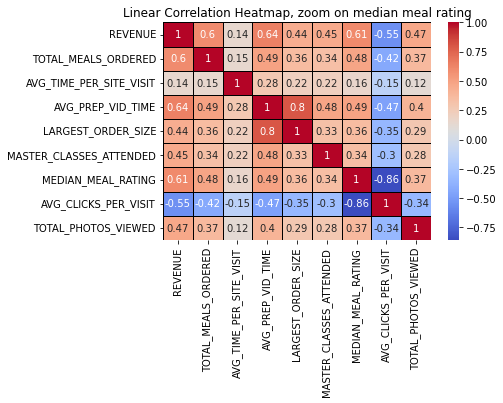
<div style = "width:image width px; font-size:80%; text-align:center;"> Figure D: Correlation Heatmap for median meal rating
   

Logically, there is also a positive correlation between median meal rating and revenue and between median meal rating and the number of total meals ordered. When customers rate high the meal sets and appreciate the brand, they will order more.

In [ ]:
# Looking at basic descritive statistics for median meal rating
print(apprentice['MEDIAN_MEAL_RATING'].describe().round(0))

In [ ]:
# Looking at correlation coefficient for median meal rating. 
rating = apprentice.corr(method = 'pearson').round(decimals = 2)
print(rating.iloc[21])

## There are variables that are not correlated to the median meal rating. 
## Those will be removed to create a clear heatmap.

In [ ]:
# Subsetting ranking with only variables that have a correlation coefficient of at least 10%
ranking_subset = apprentice.iloc[ : ,[True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True,True, True, True, True, True]]

# Creating a correlation matrix
ranking = ranking_subset.corr()

# Creating a heatmap with the correlation matrix
sns.heatmap(data       = ranking,       # correlation matrix
            cmap       = 'coolwarm',    # color
            annot      = True,          # display correaltion coefficient
            linecolor  = 'black',       # black lines between boxes
            linewidths = 0.5)           # thickness of black lines

# Adding title
plt.title("Linear Correlation Heatmap, zoom on median meal rating")

# Showing the heatmap
plt.show()


<br>
<h2>Conclusion</h2>
<br>
To conclude, Apprentice Chef's revenue is impacted negatively by the number of unique meal sets and the average number of meal sets ordered. The latter being due to the discount included with large orders. Customers are almost all reaching customer service and, most contacts are complaints. The company should analyze further those to improve. Finally, the company should make sure online content is easily accessible and that customers watch preparation videos to increase the rating of their meals.